In [1]:
%matplotlib inline

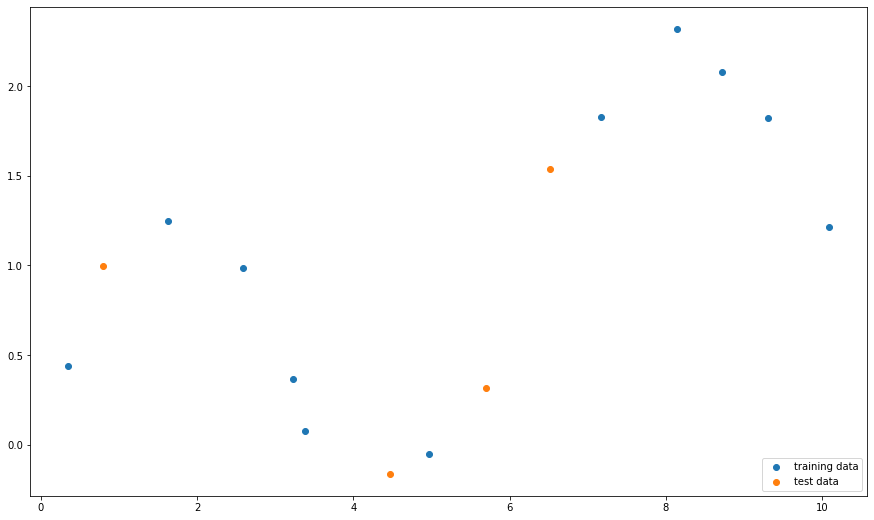

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5 # 15 buckets for the range 0:10 +/- some noise
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def part1_scatter():
    
    plt.figure(figsize=(15,9))
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);
    
    
# NOTE: Uncomment the function below to visualize the data, but be sure 
# to **re-comment it before submitting this assignment to the autograder**.

part1_scatter()

Write a function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 0: transform the data (aka add some wiggle) before fitting
x_poly1 = PolynomialFeatures(1).fit_transform(x.reshape(-1,1)) 
x_poly3 = PolynomialFeatures(3).fit_transform(x.reshape(-1,1)) 
x_poly6 = PolynomialFeatures(6).fit_transform(x.reshape(-1,1)) 
x_poly9 = PolynomialFeatures(9).fit_transform(x.reshape(-1,1)) 

# Step 1: create training & test sets
X1_train, X1_test, y_train, y_test = train_test_split(x_poly1, y, random_state=0)
X3_train, X3_test, y_train, y_test = train_test_split(x_poly3, y, random_state=0)
X6_train, X6_test, y_train, y_test = train_test_split(x_poly6, y, random_state=0)
X9_train, X9_test, y_train, y_test = train_test_split(x_poly9, y, random_state=0)

# Step 2: train/fit the model 
poly1_fit = LinearRegression().fit(X1_train, y_train)
poly3_fit = LinearRegression().fit(X3_train, y_train)
poly6_fit = LinearRegression().fit(X6_train, y_train)
poly9_fit = LinearRegression().fit(X9_train, y_train)

# Step 3: generate and return predicted ys for x = np.linspace(0,10,100) as a (4,100) array
x100 = np.linspace(0,10,100)

# calculate required polynomials
x100_poly1 = PolynomialFeatures(1).fit_transform(x100.reshape(-1,1)) 
x100_poly3 = PolynomialFeatures(3).fit_transform(x100.reshape(-1,1)) 
x100_poly6 = PolynomialFeatures(6).fit_transform(x100.reshape(-1,1)) 
x100_poly9 = PolynomialFeatures(9).fit_transform(x100.reshape(-1,1)) 

# get predicted ys for each
poly1_y100 = poly1_fit.predict(x100_poly1)
poly3_y100 = poly3_fit.predict(x100_poly3)
poly6_y100 = poly6_fit.predict(x100_poly6)
poly9_y100 = poly9_fit.predict(x100_poly9)

answer_one = np.array([poly1_y100, poly3_y100, poly6_y100, poly9_y100])


In [22]:
# Scoring function
def output_scores(model, X_train, X_test, y_train, y_test):
    print('linear model coeff (w): {}'
         .format(model.coef_))
    print('linear model intercept (b): {:.3f}'
         .format(model.intercept_))
    print('R-squared score (training): {:.3f}'
         .format(model.score(X_train, y_train)))
    print('R-squared score (test): {:.3f}'
         .format(model.score(X_test, y_test)))

### Question 2

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [23]:
from sklearn.metrics import r2_score

# degree range from 0 to 9
degrees = np.arange(0, 10, 1)

# step 0 transform x (create polynomial generators and calculate polynomials)
transformed_x = [ PolynomialFeatures(i).fit_transform(x.reshape(-1,1)) for i in degrees ]

# step 1 split data (create list of sets)
X_train_X_test_y_train_y_test = [ train_test_split(i,y, random_state=0) for i in transformed_x ]

# step 2 fit the model (create list of models)
models = [ LinearRegression().fit(i[0], i[2]) for i in X_train_X_test_y_train_y_test ]

# step 3 generate predicted ys based on x_test...

y_train_preds = [ model.predict(X_train_X_test_y_train_y_test[idx][0]) for idx, model in enumerate(models) ] 
y_test_preds = [ model.predict(X_train_X_test_y_train_y_test[idx][1]) for idx, model in enumerate(models) ] 

# step 4 get R2 score - train 
r2_train =np.asarray([ r2_score(X_train_X_test_y_train_y_test[idx][2], y_train_preds[idx]) 
            for idx, v in enumerate(X_train_X_test_y_train_y_test) ])

r2_test = np.asarray([ r2_score(X_train_X_test_y_train_y_test[idx][3], y_test_preds[idx]) 
            for idx, v in enumerate(X_train_X_test_y_train_y_test) ])

answer_two = (r2_train, r2_test)

### Question 3
Based on the  R2R2  scores from question 2 (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset?

Hint: Try plotting the  R2R2  scores from question 2 to visualize the relationship between degree level and  R2R2 . Remember to comment out the import matplotlib line before submission.

This function should return one tuple with the degree values in this order: (Underfitting, Overfitting, Good_Generalization). There might be multiple correct solutions, however, you only need to return one possible solution, for example, (1,2,3).

In [24]:
import matplotlib.pyplot as plt

def plot_r2():
    
    plt.plot(degrees, r2_train, label="Training Data")
    plt.plot(degrees, r2_test,  label="Test Data")

    plt.xlabel('Polynomial Degree')
    plt.ylabel('R2 score')

    plt.legend()
    plt.show()

#plot_r2()   

answer_three = (3, 8, 6)

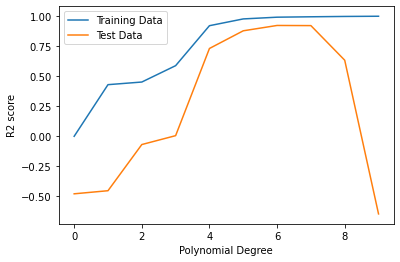

In [25]:
plot_r2()

### Question 4

Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

For this question, train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 12. Return the $R^2$ score for both the LinearRegression and Lasso model's test sets.

*This function should return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

In [8]:
x

array([ 0.35281047,  0.79431716,  1.62431903,  2.59103578,  3.23065446,
        3.375973  ,  4.47573197,  4.96972856,  5.69364194,  6.51069113,
        7.17166586,  8.14799756,  8.72363612,  9.31004929, 10.08877265])

In [61]:
from sklearn.linear_model import Lasso, LinearRegression 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# model 1: non-regularized linear regression, degree 12

# step 0: transform the data 

# create the wiggler & fit_transform to generate the polynomials for 12 degrees
poly12_x = PolynomialFeatures(12).fit_transform(x.reshape(-1,1))

# step 1: split the data
poly12_X_train, poly12_X_test, y_train, y_test = train_test_split(poly12_x, y, random_state=0)

# step 2: fit the model (non regularized)
poly12_model_non_reg = LinearRegression().fit(poly12_X_train, y_train)

# generate predicted y based on this model
poly12_model_pred_ys = poly12_model_non_reg.predict(poly12_X_test)

LinearRegression_R2_test_score = r2_score(y_test, poly12_model_pred_ys)


# model 2: regularized Lasso regression (with parameters alpha=0.01, max_iter=10000), degree 12 (need to scale features!)
poly12_X_train_scaled = scaler.fit_transform(poly12_X_train)
poly12_X_test_scaled = scaler.transform(poly12_X_test)

# fit a Lasso fit
poly12_model_lasso = Lasso(alpha=0.01, max_iter=10000).fit(poly12_X_train_scaled, y_train)

# generate predicted y based on this model
poly12_model_lasso_pred_ys = poly12_model_lasso.predict(poly12_X_test_scaled)


Lasso_R2_test_score = r2_score(y_test, poly12_model_lasso_pred_ys)


answer_four = (LinearRegression_R2_test_score, Lasso_R2_test_score)
answer_four

(-4.311980555741178, 0.011476661596738214)